<a href="https://colab.research.google.com/github/Pasinduimalsha/Agentic-tut/blob/main/Langraph_stage_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install langgraph -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.3/153.3 kB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.9/43.9 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.6/54.6 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.7/216.7 kB 4.3 MB/s eta 0:00:00


In [8]:
from typing import TypedDict

In [52]:
class AgentState(TypedDict):
    num1: int
    num2: int
    result: int
    operation: str

In [53]:
def addition(state: AgentState)-> AgentState:
  state["result"] = state["num1"] + state["num2"]
  return state
def substraction(state: AgentState)-> AgentState:
  state["result"] = state["num1"] - state["num2"]
  return state
def multiplication(state: AgentState)-> AgentState:
  state["result"] = state["num1"] * state["num2"]
  return state
def division(state: AgentState)-> AgentState:
  state["result"] = state["num1"] / state["num2"]
  return state
def decision_node(state: AgentState)-> AgentState:
  if state["operation"] == "+":
    return "addition_operation"
  elif state["operation"] == "-":
    return "substraction_operation"
  elif state["operation"] == "*":
    return "multiplication_operation"
  elif state["operation"] == "/":
    return "division_operation"

In [54]:
from langgraph.graph import StateGraph, START, END

In [55]:
workflow = StateGraph(AgentState);

workflow.add_node("addition", addition)
workflow.add_node("substraction", substraction)
workflow.add_node("multiplication", multiplication)
workflow.add_node("division", division)
workflow.add_node("router", lambda state:state)

workflow.add_edge(START, "router")
workflow.add_conditional_edges(
    "router",
    decision_node,
    {
        "addition_operation": "addition",
        "substraction_operation": "substraction",
        "multiplication_operation": "multiplication",
        "division_operation": "division"
    }
)
workflow.add_edge("addition", END)
workflow.add_edge("substraction", END)
workflow.add_edge("multiplication", END)
workflow.add_edge("division", END)

app = workflow.compile()

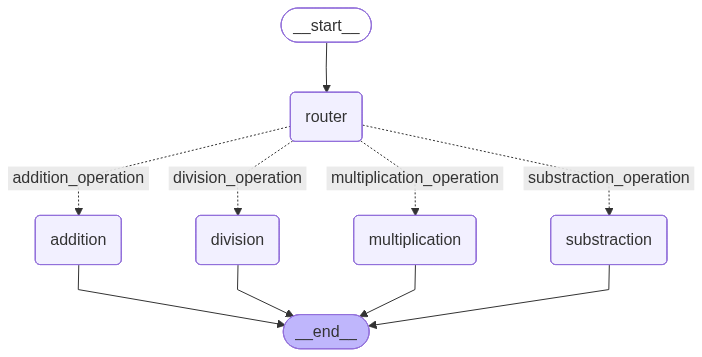

In [56]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [58]:
result = app.invoke({"num1": 20, "num2": 5, "operation": "+"})
print(result['result'])

25
